In [10]:
import pandas as pd
import os
import re
from pingouin import welch_anova
import seaborn as sns
import matplotlib.pyplot as plt
import plotly#.express as px
import numpy as np
import statistics
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
df=pd.read_csv(r"C:\Users\Dell\Documents\projects\customer segmentation\marketing_campaign_stores.csv")
df=df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [11]:
print(os.listdir(r"C:\Users\Dell\Documents\projects\customer segmentation"))

['df_embedding.csv', 'marketing_campaign_stores.csv', 'online_Marketing_campaign.csv']


### Loading the dataset

In [12]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [13]:
cols=list(df.columns)
cols

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [14]:
a=list(df['AcceptedCmp1'].unique())
a

[0, 1]

In [15]:
df=df.drop(columns=['Z_CostContact','Z_Revenue'])

### Removing unnecessary features (reason: both of them are constant for the whole of dataset and won't have any effect if removed)

In [16]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0


In [17]:
corr=df.corr()

C:\Users\Dell\AppData\Local\Temp\ipykernel_11884\1726683880.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


In [18]:
corr.style.background_gradient(cmap='coolwarm')

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,-0.013438,-0.037166,-0.018924,-0.003440,-0.014927,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,-0.021968
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.060846,-0.145040,-0.121275,-0.128272,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,0.021325
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,0.133047
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,-0.080008
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,-0.154446
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,-0.198437
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,0.247254
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,0.125289
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,0.236335
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,0.111331


### corr() ignores the categorical features.
#### Key findings:
#### 1. Except for the income there is no any other factor affecting the purchase of products and also the categories of purchases. 
#### 2. There is high correlation between different categories of products among themselves which is obvious!!
#### 3. Different campaigns have different affect on different products purchased. 
#### 4. Also different campaigns had dirrent affect on the mode of purchase too. 

In [19]:
new=df.copy()

In [20]:
new['Dt_Customer']=pd.to_datetime(new['Dt_Customer'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_11884\2489421801.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  new['Dt_Customer']=pd.to_datetime(new['Dt_Customer'])


In [21]:
new['buying_year']=new['Dt_Customer'].dt.year

In [22]:
print(list(new['buying_year'].unique()))

[2012, 2014, 2013]


In [23]:
new['age']=new['buying_year']-new['Year_Birth']

In [24]:
print(list(new['age'].unique()))

[55, 60, 48, 30, 33, 46, 41, 28, 39, 64, 36, 54, 61, 25, 66, 32, 27, 34, 63, 62, 44, 37, 24, 50, 42, 67, 43, 70, 38, 16, 45, 58, 57, 35, 47, 26, 31, 65, 40, 53, 52, 68, 49, 21, 51, 22, 29, 20, 113, 59, 121, 23, 56, 114, 71, 72, 69, 19, 18, 17, 73]


In [25]:
new['time_aqui']=2014-new['buying_year']

In [26]:
print(list(new['time_aqui'].unique()))

[2, 0, 1]


In [27]:
new.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
buying_year             0
age                     0
time_aqui               0
dtype: int64

In [28]:
median_income=new['Income'].median(skipna=True)
median_income

51381.5

In [29]:
new['Income']=new['Income'].fillna(median_income)

In [30]:
new.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
buying_year            0
age                    0
time_aqui              0
dtype: int64

In [31]:
for ele in list(['MntWines','MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',]):
     aov = welch_anova(dv=ele, between='Marital_Status', data=new)
     print('Marital status','---',ele)
     print(aov)

C:\Users\Dell\anaconda3\lib\site-packages\pingouin\parametric.py:1343: RuntimeWarning: invalid value encountered in scalar divide
  adj_grandmean = (weights * grp.mean()).sum() / weights.sum()
C:\Users\Dell\anaconda3\lib\site-packages\pingouin\parametric.py:1343: RuntimeWarning: invalid value encountered in scalar divide
  adj_grandmean = (weights * grp.mean()).sum() / weights.sum()
C:\Users\Dell\anaconda3\lib\site-packages\pingouin\parametric.py:1343: RuntimeWarning: invalid value encountered in scalar divide
  adj_grandmean = (weights * grp.mean()).sum() / weights.sum()
C:\Users\Dell\anaconda3\lib\site-packages\pingouin\parametric.py:1343: RuntimeWarning: invalid value encountered in scalar divide
  adj_grandmean = (weights * grp.mean()).sum() / weights.sum()
C:\Users\Dell\anaconda3\lib\site-packages\pingouin\parametric.py:1343: RuntimeWarning: invalid value encountered in scalar divide
  adj_grandmean = (weights * grp.mean()).sum() / weights.sum()
C:\Users\Dell\anaconda3\lib\site-pa

Marital status --- MntWines
           Source  ddof1      ddof2    F  p-unc       np2
0  Marital_Status      7  13.793462  0.0    1.0  0.002435
Marital status --- MntFruits
           Source  ddof1      ddof2    F  p-unc       np2
0  Marital_Status      7  13.793462  0.0    1.0  0.003991
Marital status --- MntMeatProducts
           Source  ddof1      ddof2    F  p-unc       np2
0  Marital_Status      7  13.793462  0.0    1.0  0.003309
Marital status --- MntFishProducts
           Source  ddof1      ddof2    F  p-unc       np2
0  Marital_Status      7  13.793462  0.0    1.0  0.012427
Marital status --- MntSweetProducts
           Source  ddof1      ddof2    F  p-unc       np2
0  Marital_Status      7  13.793462  0.0    1.0  0.003681
Marital status --- MntGoldProds
           Source  ddof1      ddof2    F  p-unc       np2
0  Marital_Status      7  13.793462  0.0    1.0  0.011103
Marital status --- NumDealsPurchases
           Source  ddof1      ddof2    F  p-unc       np2
0  Marital_Sta

C:\Users\Dell\anaconda3\lib\site-packages\pingouin\parametric.py:1343: RuntimeWarning: invalid value encountered in scalar divide
  adj_grandmean = (weights * grp.mean()).sum() / weights.sum()
C:\Users\Dell\anaconda3\lib\site-packages\pingouin\parametric.py:1343: RuntimeWarning: invalid value encountered in scalar divide
  adj_grandmean = (weights * grp.mean()).sum() / weights.sum()


### Trying to find affect of marital status on key features using anova (To find affect of categorical feature on numerical features)

In [32]:
for ele in list(['MntWines','MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',]):
     aov = welch_anova(dv=ele, between='Education', data=new)
     print('eductaion','---',ele)
     print(aov)

eductaion --- MntWines
      Source  ddof1       ddof2           F          p-unc       np2
0  Education      4  728.051232  339.405836  9.682520e-165  0.050019
eductaion --- MntFruits
      Source  ddof1       ddof2          F         p-unc       np2
0  Education      4  354.620555  16.687942  1.523389e-12  0.017908
eductaion --- MntMeatProducts
      Source  ddof1       ddof2          F          p-unc       np2
0  Education      4  746.962459  210.78183  5.638907e-121  0.014229
eductaion --- MntFishProducts
      Source  ddof1       ddof2          F         p-unc       np2
0  Education      4  330.657733  16.550603  2.250532e-12  0.021843
eductaion --- MntSweetProducts
      Source  ddof1      ddof2         F         p-unc       np2
0  Education      4  345.39683  16.67792  1.647943e-12  0.020708
eductaion --- MntGoldProds
      Source  ddof1       ddof2          F         p-unc       np2
0  Education      4  349.285637  21.169674  1.204689e-15  0.024525
eductaion --- NumDealsPurchas

### Trying to find affect of education level on key features using anova 

In [33]:
new=new.drop(columns=['Year_Birth','Dt_Customer','buying_year'])

In [34]:
cols=list(new.columns)
cols

['ID',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'age',
 'time_aqui']

In [35]:
new=pd.get_dummies(new,columns=['Education','Marital_Status'],prefix_sep=' ',prefix={'Education':'edu','Marital_Status':'Marital status'})

### one hot encoding education and marital status.

In [36]:
cols=list(new.columns)
cols

['ID',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'age',
 'time_aqui',
 'edu 2n Cycle',
 'edu Basic',
 'edu Graduation',
 'edu Master',
 'edu PhD',
 'Marital status Absurd',
 'Marital status Alone',
 'Marital status Divorced',
 'Marital status Married',
 'Marital status Single',
 'Marital status Together',
 'Marital status Widow',
 'Marital status YOLO']

In [37]:
list(new['AcceptedCmp1'].unique())

[0, 1]

In [38]:
new=new.rename(columns={'time_aqui':'timeaqui'})

In [39]:
corr=new.corr()
corr.style.background_gradient(cmap='coolwarm')

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,timeaqui,edu 2n Cycle,edu Basic,edu Graduation,edu Master,edu PhD,Marital status Absurd,Marital status Alone,Marital status Divorced,Marital status Married,Marital status Single,Marital status Together,Marital status Widow,Marital status YOLO
ID,1.000000,0.012996,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,-0.013438,-0.037166,-0.018924,-0.003440,-0.014927,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,-0.021968,-0.000393,0.006414,-0.000384,-0.009478,0.018713,-0.025833,0.004368,0.004230,-0.032310,-0.017289,0.010007,-0.016558,0.009563,0.021937,0.002029
Income,0.012996,1.000000,-0.425326,0.018965,-0.004061,0.576903,0.428791,0.577805,0.437564,0.436131,0.321938,-0.082315,0.380554,0.586826,0.526600,-0.549785,-0.016064,0.182718,0.334893,0.274891,0.087581,-0.027187,0.132867,0.161654,-0.022381,-0.057373,-0.200490,0.018866,0.011707,0.081134,0.024037,-0.012360,0.008096,-0.016327,-0.025773,0.023261,0.031486,-0.004545
Kidhome,0.002406,-0.425326,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,-0.080008,-0.226396,-0.053339,0.019727,0.054144,0.000648,0.008146,-0.042013,-0.024669,0.037813,-0.019199,0.017403,0.019779,0.006373,-0.073760,-0.024669
Teenhome,-0.002580,0.018965,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,-0.154446,0.350505,0.008260,-0.056468,-0.119421,-0.022213,0.023601,0.089451,-0.027798,0.010791,0.052613,0.007749,-0.095925,0.025038,0.045093,0.027112
Recency,-0.046524,-0.004061,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,-0.198437,0.018322,0.026084,-0.007530,-0.003609,0.032184,-0.023394,-0.011377,0.004017,-0.023746,0.004434,-0.022757,0.007158,0.020363,0.000218,-0.047603
MntWines,-0.022878,0.576903,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,0.247254,0.148484,0.154188,-0.099205,-0.138570,-0.058808,0.038517,0.157295,0.004581,-0.012979,0.021120,-0.010491,-0.024216,0.005077,0.036632,0.001605
MntFruits,0.004600,0.428791,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,0.125289,0.014719,0.055150,0.021065,-0.060043,0.113177,-0.051996,-0.082772,0.043752,-0.020539,0.009612,-0.011304,0.007002,-0.014155,0.032211,-0.017518
MntMeatProducts,-0.004437,0.577805,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,0.236335,0.026077,0.082472,-0.035943,-0.108306,0.055913,-0.007040,0.003855,0.019281,-0.022819,-0.025219,-0.022011,0.035079,0.003021,0.018675,-0.015492
MntFishProducts,-0.024475,0.437564,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,0.111331,0.037641,0.067611,0.057553,-0.058906,0.103627,-0.044186,-0.104060,0.091940,-0.020020,-0.015449,-0.031116,0.006609,0.015865,0.047894,-0.018350
MntSweetProducts,-0.007642,0.436131,-0.370673,-0.162475,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724,-0.120100,0.348544,0.490924,0.4487

In [40]:
new

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,edu Master,edu PhD,Marital status Absurd,Marital status Alone,Marital status Divorced,Marital status Married,Marital status Single,Marital status Together,Marital status Widow,Marital status YOLO
0,5524,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,0,0,1,0,0,0
1,2174,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,1,0,0,0
2,4141,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,1,0,0
3,6182,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,0,0,1,0,0
4,5324,58293.0,1,0,94,173,43,118,46,27,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,0,0,1,0,0,0,0
2236,4001,64014.0,2,1,56,406,0,30,0,0,...,0,1,0,0,0,0,0,1,0,0
2237,7270,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,0,1,0,0,0,0,0
2238,8235,69245.0,0,1,8,428,30,214,80,30,...,1,0,0,0,0,0,0,1,0,0


In [41]:
new['total_purchases']=0
for ele in list(['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',]):
    new['total_purchases']+=new[ele]

### creating a new feature as sum of all purchases.

In [42]:
list(new['total_purchases'].unique())

[1617,
 27,
 776,
 53,
 422,
 716,
 590,
 169,
 46,
 49,
 19,
 61,
 1102,
 310,
 1315,
 96,
 317,
 1782,
 133,
 316,
 1730,
 972,
 544,
 444,
 75,
 257,
 637,
 131,
 1672,
 30,
 318,
 120,
 302,
 1196,
 65,
 913,
 81,
 67,
 902,
 1395,
 22,
 186,
 31,
 984,
 122,
 55,
 124,
 1319,
 507,
 1693,
 72,
 606,
 1957,
 1093,
 29,
 518,
 1438,
 612,
 884,
 1076,
 34,
 11,
 1274,
 653,
 1562,
 1253,
 109,
 863,
 661,
 13,
 1890,
 2209,
 18,
 692,
 165,
 16,
 79,
 778,
 56,
 151,
 372,
 1366,
 194,
 603,
 985,
 32,
 43,
 45,
 63,
 978,
 410,
 1169,
 1120,
 1097,
 187,
 910,
 145,
 850,
 969,
 1820,
 608,
 730,
 551,
 114,
 1724,
 577,
 33,
 660,
 80,
 1135,
 559,
 1923,
 90,
 404,
 463,
 632,
 725,
 279,
 1482,
 106,
 38,
 2077,
 1053,
 1385,
 871,
 312,
 877,
 68,
 211,
 127,
 459,
 460,
 429,
 89,
 1021,
 1381,
 306,
 162,
 1231,
 1706,
 121,
 1293,
 1608,
 88,
 421,
 259,
 1117,
 36,
 57,
 148,
 93,
 119,
 1835,
 1318,
 10,
 191,
 1033,
 66,
 50,
 39,
 1581,
 1282,
 91,
 315,
 834,
 1600,
 12

In [43]:
edu=pd.DataFrame(df['Education']).copy()
edu['total_purchase']=new['total_purchases'].copy()

In [44]:
edu

,Education,total_purchase
0,Graduation,1617
1,Graduation,27
2,Graduation,776
3,Graduation,53
4,PhD,422
...,...,...
2235,Graduation,1341
2236,PhD,444
2237,Graduation,1241
2238,Master,843


In [45]:
edu_plot=edu.groupby(['Education']).sum()
edu_plot

,total_purchase
Education,
2n Cycle,100795
Basic,4417
Graduation,698626
Master,226359
PhD,326791


In [46]:
edu_plot_avg=edu.groupby(['Education']).mean()
edu_plot_avg

,total_purchase
Education,
2n Cycle,496.527094
Basic,81.796296
Graduation,619.898846
Master,611.781081
PhD,672.409465


Text(0.5, 1.0, 'total no of purchases by education')

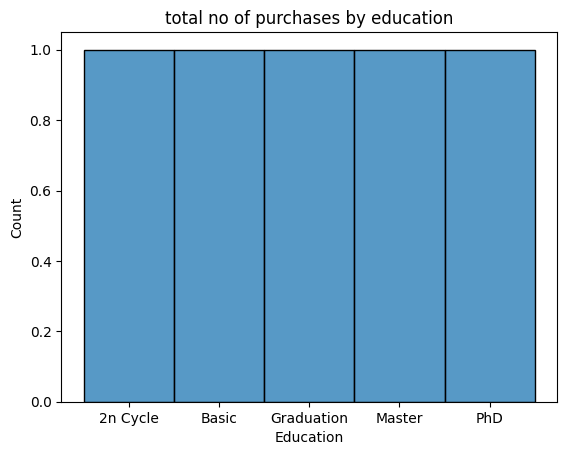

In [47]:
sns.histplot(data=edu_plot, x="Education")#, y="total_purchase")
plt.title("total no of purchases by education")

Text(0.5, 1.0, 'total no of purchases by education')

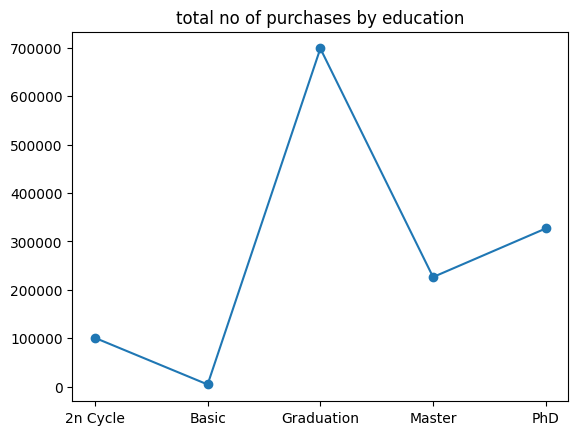

In [81]:
plt.plot(edu_plot['total_purchase'],marker='o')
plt.title('total no of purchases by education')

Text(0.5, 1.0, 'average purchase by education')

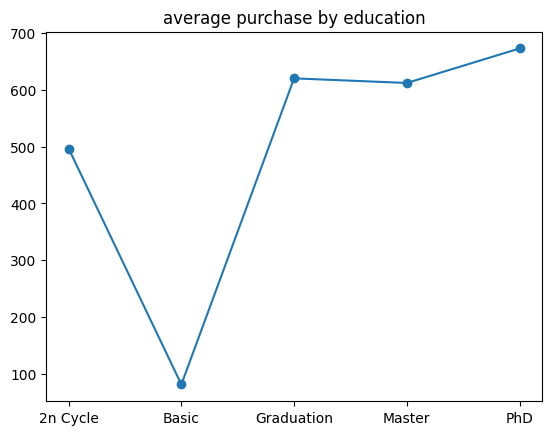

In [82]:
plt.plot(edu_plot_avg['total_purchase'],marker='o')
plt.title('average purchase by education')

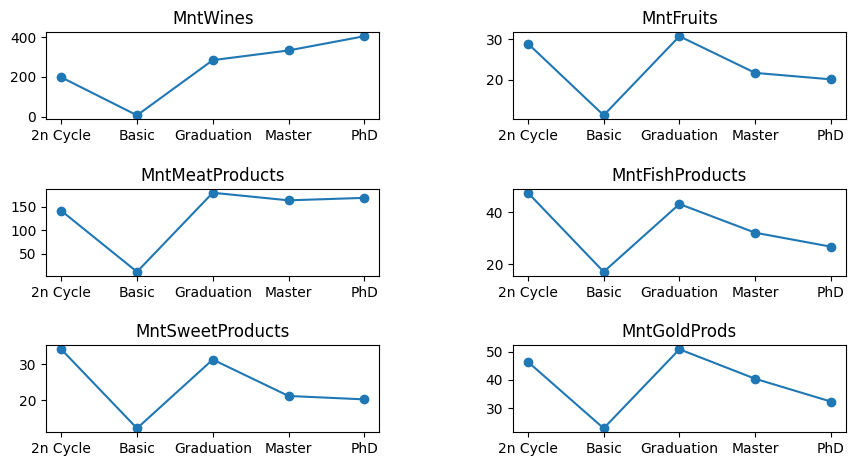

In [84]:
count=1
plt.figure(figsize=(10,5))
for ele in list(['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']):
    temp=pd.DataFrame(df['Education']).copy()
    temp[ele]=new[ele].copy()
    temp=temp.groupby(['Education']).mean()
    plt.subplot(3,2,count)
    plt.gca().set_title(ele)
    plt.plot(temp,marker='o')
    count+=1
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.8)
plt.show()

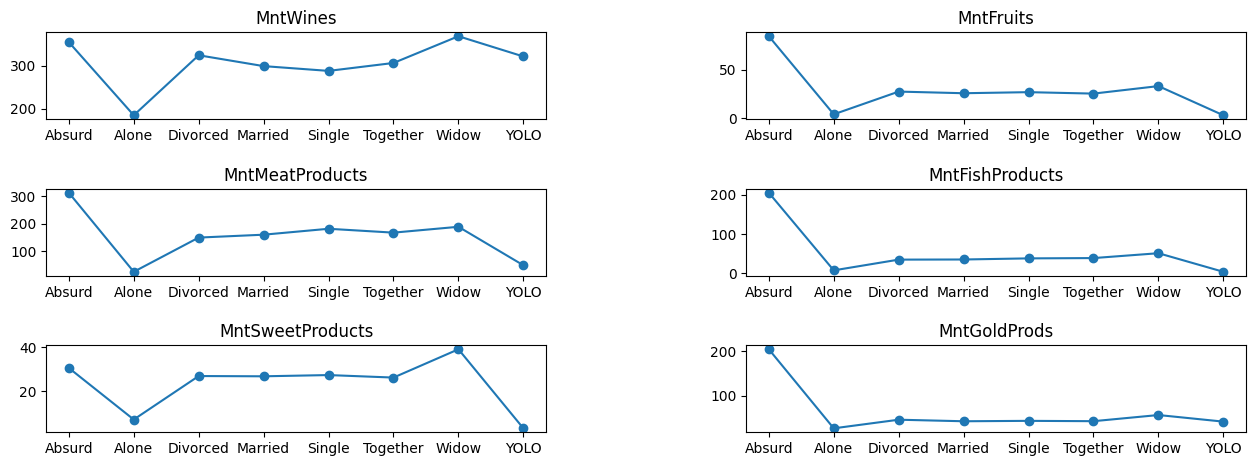

In [51]:
count=1
plt.figure(figsize=(15,5))
for ele in list(['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']):
    temp=pd.DataFrame(df['Marital_Status']).copy()
    temp[ele]=new[ele].copy()
    temp=temp.groupby(['Marital_Status']).mean()
    plt.subplot(3,2,count)
    plt.gca().set_title(ele)
    plt.plot(temp,marker='o')
    count+=1
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.8)
plt.show()

### Purchase of different categories by Education

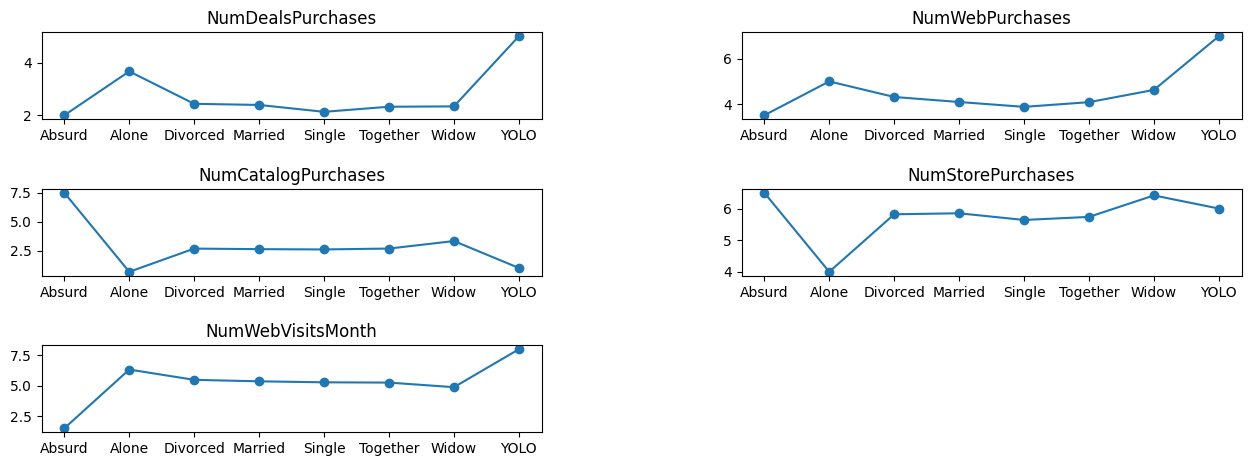

In [52]:
count=1
plt.figure(figsize=(15,5))
for ele in list(['NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']):
    temp=pd.DataFrame(df['Marital_Status']).copy()
    temp[ele]=new[ele].copy()
    temp=temp.groupby(['Marital_Status']).mean()
    plt.subplot(3,2,count)
    plt.gca().set_title(ele)
    plt.plot(temp,marker='o')
    count+=1
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.8)
plt.show()

### No of purchases in different modes by marital status

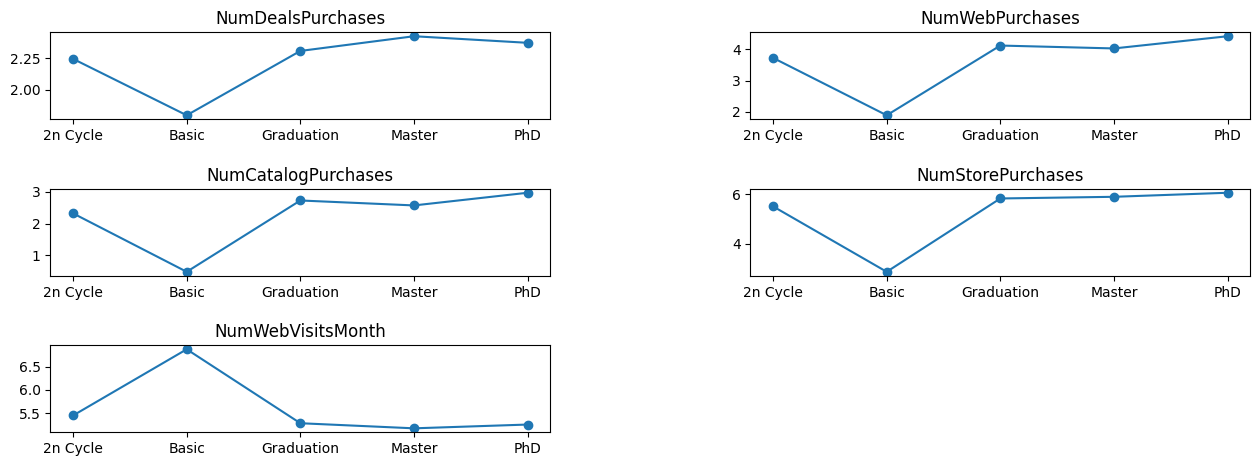

In [53]:
count=1
plt.figure(figsize=(15,5))
for ele in list(['NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']):
    temp=pd.DataFrame(df['Education']).copy()
    temp[ele]=new[ele].copy()
    temp=temp.groupby(['Education']).mean()
    plt.subplot(3,2,count)
    plt.gca().set_title(ele)
    plt.plot(temp,marker='o')
    count+=1
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.8)
plt.show()

### No of purchases from different modes by education

In [54]:
count=new['AcceptedCmp3'].value_counts()

In [55]:
count

0    2077
1     163
Name: AcceptedCmp3, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1428430535479.3562
704995626740.0498
349915349222.19275
207069435193.2265


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_k

147948165684.35266
106663269637.21414


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


77352211196.15073
64656369790.2341


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


54990469387.54602
47868050998.99281


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


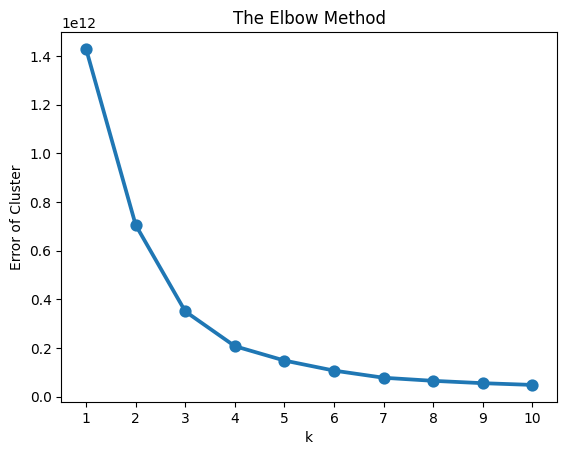

In [56]:
errors = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(new)
    errors.append(model.inertia_)
    print(model.inertia_)
 
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('Error of Cluster')
sns.pointplot(x=list(range(1, 11)), y=errors)
plt.show()

### Checking the optimum no of clusters using elbow method. we've chose 5 clusters considering both the graph and some domain specific information.

In [57]:
model = KMeans(n_clusters=5, random_state=42)
model.fit(new)
y=model.predict(new)


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Training and prediction using k means

In [58]:
y.tolist()

[1,
 2,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 4,
 2,
 2,
 4,
 2,
 2,
 0,
 1,
 1,
 2,
 0,
 2,
 2,
 2,
 4,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 0,
 2,
 2,
 4,
 0,
 0,
 2,
 0,
 4,
 0,
 2,
 2,
 1,
 1,
 4,
 2,
 4,
 1,
 4,
 1,
 0,
 2,
 1,
 4,
 1,
 1,
 1,
 1,
 0,
 0,
 4,
 1,
 4,
 1,
 2,
 1,
 1,
 0,
 2,
 4,
 4,
 0,
 1,
 0,
 0,
 0,
 2,
 4,
 0,
 2,
 2,
 4,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 4,
 2,
 2,
 2,
 4,
 1,
 4,
 0,
 2,
 2,
 2,
 4,
 4,
 1,
 1,
 4,
 2,
 2,
 4,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 4,
 1,
 4,
 1,
 2,
 4,
 1,
 1,
 4,
 2,
 2,
 1,
 0,
 0,
 2,
 2,
 4,
 1,
 4,
 1,
 2,
 1,
 0,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 4,
 0,
 1,
 0,
 4,
 4,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 2,
 4,
 4,
 2,
 2,
 4,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 4,
 2,
 0,
 1,
 2,
 2,
 2,
 0,
 1,
 4,
 4,
 2,
 1,
 4,
 1,
 4,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 4,
 2,
 2,
 1,
 2,
 2,
 4,
 2,
 1,
 2,
 1,
 4,
 0,
 1,
 2,
 2,
 2,
 4,
 2,
 2,
 4,
 2,
 0,
 1,
 0,
 0,
 4,
 0,
 1,
 4,
 1,
 0,
 4,
 1,
 0,
 4,
 4,
 1,
 1,


In [59]:
print(list(new.columns))

['ID', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'age', 'timeaqui', 'edu 2n Cycle', 'edu Basic', 'edu Graduation', 'edu Master', 'edu PhD', 'Marital status Absurd', 'Marital status Alone', 'Marital status Divorced', 'Marital status Married', 'Marital status Single', 'Marital status Together', 'Marital status Widow', 'Marital status YOLO', 'total_purchases']


In [60]:
new['res_full']=y.copy()

### Appending the predicted cluster values to the table

In [61]:
print(list(new['res_full'].unique()))

[1, 2, 0, 4, 3]


In [62]:
records=new.loc[np.where(new['res_full']==4)]

In [63]:
records

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Marital status Absurd,Marital status Alone,Marital status Divorced,Marital status Married,Marital status Single,Marital status Together,Marital status Widow,Marital status YOLO,total_purchases,res_full
15,2114,82800.0,0,0,23,1006,22,115,59,68,...,0,0,0,0,1,0,0,0,1315,4
18,6565,76995.0,0,1,91,1012,80,498,0,16,...,0,0,0,1,0,0,0,0,1782,4
29,1966,84618.0,0,0,96,684,100,801,21,66,...,0,0,0,1,0,0,0,0,1672,4
40,8601,80011.0,0,1,3,421,76,536,82,178,...,0,0,0,1,0,0,0,0,1395,4
45,1371,79941.0,0,0,72,123,164,266,227,30,...,0,0,0,0,1,0,0,0,984,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,2736,73807.0,0,1,88,366,124,156,71,78,...,0,0,0,1,0,0,0,0,849,4
2211,10469,88325.0,0,0,42,519,71,860,93,27,...,0,0,0,0,0,1,0,0,1623,4
2213,3661,80617.0,0,0,42,594,51,631,72,55,...,0,0,0,0,1,0,0,0,1435,4
2217,9589,82032.0,0,0,54,332,194,377,149,125,...,0,0,0,0,0,0,1,0,1234,4


In [64]:
print(statistics.median(list(records['total_purchases'])))

1435


In [65]:
new['y']=y.copy()

In [66]:
print(new['y'].unique())

[1 2 0 4 3]


In [67]:
names={}
nm=pd.DataFrame()
for i in range(0,5):
    name="new_"+str(i)
    nm=new.loc[new['y']==i]
    names[name]=nm
print(names)

{'new_0':          ID   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
3      6182  26646.0        1         0       26        11          4   
7      6177  33454.0        1         0       32        76         10   
8      4855  30351.0        1         0       19        14          0   
9      5899   5648.0        1         1       68        28          0   
11      387   7500.0        0         0       59         6         16   
...     ...      ...      ...       ...      ...       ...        ...   
2222  10659   7500.0        1         0        7         2          8   
2223   1448  33562.0        1         2       33        21         12   
2229  10084  24434.0        2         0        9         3          2   
2230   7004  11012.0        1         0       82        24          3   
2232   8080  26816.0        0         0       50         5          1   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
3                  20               10          

### creating a dictionary of dataframes of different cluster values.

In [68]:
dt1=pd.DataFrame()
dt2={}
vals=[]
col_names=list(new.columns)
for col in col_names:
    dt1=pd.DataFrame()
    for name in names:
        vals=[]
        new_n=str(name)+"_"+str(col)
        vals.append(names[name][col].sum())
        vals.append(max(names[name][col]))
        vals.append(min(names[name][col]))
        vals.append(names[name][col].mean())
        vals.append(names[name][col].median())
        vals.append(names[name][col].std())
        vals.append(names[name][col].var())
        dt1[new_n]=vals
    dt2[col]=dt1
for col in col_names:
    dt2[col].index=['sum','max','min','mean','median','standard deviation','variance']

### Finding key values ['sum','max','min','mean','median','standard deviation','variance'] for each feature of different cluters and printing it for easy analysis.

In [69]:
dt2

{'ID':                         new_0_ID      new_1_ID      new_2_ID  new_3_ID  \
 sum                 2.870884e+06  3.715074e+06  3.722653e+06    9432.0   
 max                 1.118800e+04  1.117600e+04  1.119100e+04    9432.0   
 min                 1.300000e+01  0.000000e+00  9.000000e+00    9432.0   
 mean                5.753275e+03  5.680541e+03  5.387342e+03    9432.0   
 median              5.623000e+03  5.627000e+03  5.286000e+03    9432.0   
 standard deviation  3.216239e+03  3.294558e+03  3.291023e+03       NaN   
 variance            1.034419e+07  1.085411e+07  1.083083e+07       NaN   
 
                         new_4_ID  
 sum                 2.208395e+06  
 max                 1.118100e+04  
 min                 1.460000e+02  
 mean                5.590873e+03  
 median              5.341000e+03  
 standard deviation  3.116468e+03  
 variance            9.712376e+06  ,
 'Income':                     new_0_Income  new_1_Income  new_2_Income  new_3_Income  \
 sum          

In [70]:
centroids=model.cluster_centers_

In [71]:
print(centroids)

[[ 5.75327455e+03  2.41580561e+04  7.91583166e-01  2.28456914e-01
   4.79198397e+01  1.93486974e+01  5.75350701e+00  2.18276553e+01
   8.32865731e+00  5.76352705e+00  1.64168337e+01  2.02805611e+00
   1.97995992e+00  4.58917836e-01  2.94188377e+00  7.03607214e+00
   8.01603206e-02  2.00400802e-03  1.11022302e-16  9.71445147e-17
   5.20417043e-18  1.00200401e-02  1.00200401e-01  3.88957916e+01
   9.91983968e-01  1.30260521e-01  1.06212425e-01  5.13026052e-01
   1.28256513e-01  1.22244489e-01  1.30104261e-18  6.50521303e-19
   9.01803607e-02  3.94789579e-01  2.38476954e-01  2.56513026e-01
   2.00400802e-02  1.30104261e-18  7.74388778e+01]
 [ 5.68054128e+03  6.34274159e+04  1.88073394e-01  7.09480122e-01
   4.82859327e+01  4.82692661e+02  3.74266055e+01  2.13711009e+02
   5.12874618e+01  3.70061162e+01  6.28990826e+01  2.72935780e+00
   5.65137615e+00  3.77522936e+00  8.04128440e+00  4.55810398e+00
   3.97553517e-02  1.13149847e-01  3.51681957e-02  4.89296636e-02
   1.83486239e-02  7.6452

In [72]:
centroid_list=pd.DataFrame(centroids,columns=['ID', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'age', 'timeaqui', 'edu 2n Cycle', 'edu Basic', 'edu Graduation', 'edu Master', 'edu PhD', 'Marital status Absurd', 'Marital status Alone', 'Marital status Divorced', 'Marital status Married', 'Marital status Single', 'Marital status Together', 'Marital status Widow', 'Marital status YOLO', 'total_purchases'])

In [73]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 20,
                       ):
    print(centroid_list)

                          ID                       Income  \
0  5753.27454909819698514184   24158.05611222444349550642   
1  5680.54128440367003349820   63427.41590214068128261715   
2  5387.34153400868399330648   43457.14182344428991200402   
3  9432.00000000000000000000  666666.00000000000000000000   
4  5590.87341772151921759360   82990.16202531645831186324   

                  Kidhome                Teenhome                  Recency  \
0  0.79158316633266512241  0.22845691382765526134  47.91983967935871646660   
1  0.18807339449541288223  0.70948012232415902378  48.28593272171254113800   
2  0.64688856729377719468  0.67004341534008693415  50.21273516642546752564   
3  1.00000000000000000000  0.00000000000000000000  23.00000000000000000000   
4  0.07341772151898745546  0.23544303797468357775  50.11139240506329173286   

                   MntWines                MntFruits  \
0   19.34869739478921246700   5.75350701402805952966   
1  482.69266055045841312676  37.42660550458715817967

### After analysing the key values ['sum','max','min','mean','median','standard deviation','variance'] for each feature of different cluters and the cluster centroids we were unable to find any hidden details that could help us in the cluster segmentaion. We found that Income is the main factor on which clusters are formed with little contribution from the education.Every other dependent variables like product categories, mode of purchase allign according to the income and education. Remaining features do not have much of affect on the cluster formation just as we found out in correlation matrix. we shall use this insight along with the previous visualizations to form useful insights.
### note: we used mean/centroid to see where the data lies and variance to see how different each cluster is from the other and (min,max) for the range.

### centroid for each cluster by each features

In [74]:
centroid_list.shape

(5, 39)

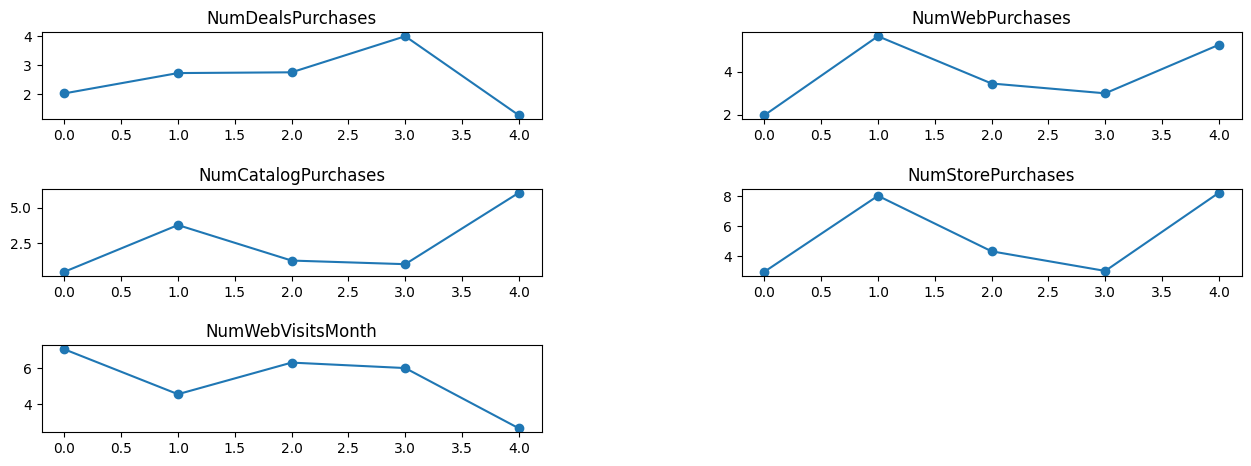

In [75]:
count=1
plt.figure(figsize=(15,5))
for ele in list(['NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']):
    temp=pd.DataFrame(new['res_full']).copy()
    temp[ele]=new[ele].copy()
    temp=temp.groupby(['res_full']).mean()
    plt.subplot(3,2,count)
    plt.gca().set_title(ele)
    plt.plot(temp,marker='o')
    count+=1
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.8)
plt.show()

### Mean no of purchases through different modes, visits for each clusters.

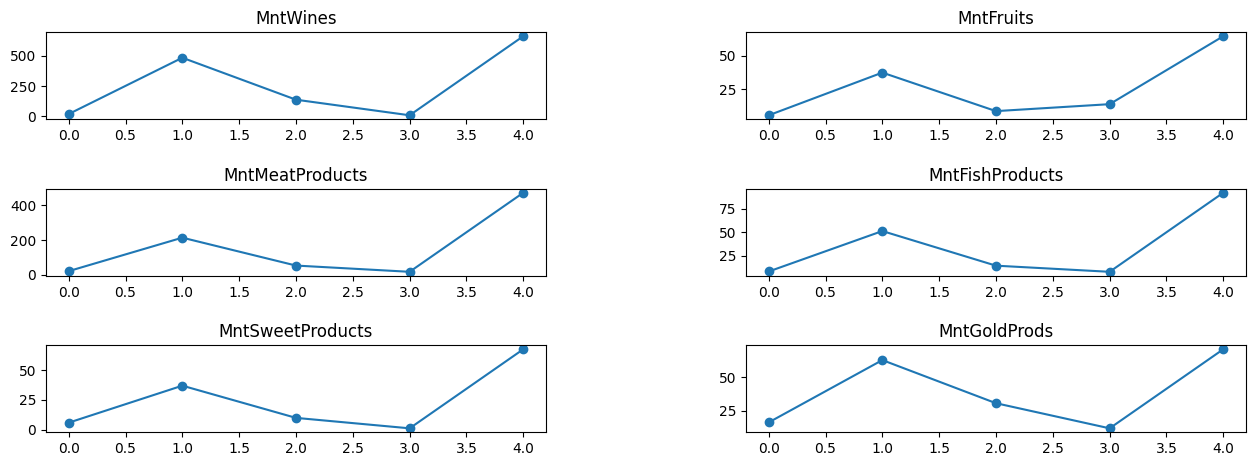

In [76]:
count=1
plt.figure(figsize=(15,5))
for ele in list(['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']):
    temp=pd.DataFrame(new['res_full']).copy()
    temp[ele]=new[ele].copy()
    temp=temp.groupby(['res_full']).mean()
    plt.subplot(3,2,count)
    plt.gca().set_title(ele)
    plt.plot(temp,marker='o')
    count+=1
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.8)
plt.show()

In [77]:
print(temp)

          MntGoldProds
res_full              
0            16.416834
1            62.899083
2            30.736614
3            12.000000
4            70.962025


# KEY OBSERVATIONS

# 1.  it was observed that except the income of an individual there's no any other strong relations that can be established which affects the amount of goods the individuals have purchased.

# 2. Even in individual categories the mean amount of products purchased to directly proportional to the income of the individual.

# 3. coming to web visits the highest is by people of cluster 2 but they aren't buying as much as that of cluster 4,1 may be due to low income. we can push affordable items and deals to them at this point and try to increase the sales.

# 4. all other factors except marital status has played small but significant role in deciding(formation) the clusters.

# 5. even coming to the total purchases by volume the clusters 1,4 occupy a major role followed by the clusters 0,2.

# 6. on an average people with higher education levels have contributed more to total purchases than an individual with basic levels of education.

# 7. education levels have a clear upward trend in the amount of purchases made (on an average by each person) in each of the categories.

